<a href="https://colab.research.google.com/github/Sameekshashetty30/Pneumonia_Detection/blob/main/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install tensorflow keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation,Dropout,BatchNormalization,Flatten,Dense,AvgPool2D,MaxPool2D
from keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import matplotlib.image as mpimg
import plotly.offline as py
import plotly.express as px
import prophet
from prophet.plot import plot_plotly, add_changepoints_to_plot

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sameekshasshetty","key":"28bf55b15c769a7ef0a262c4af288e13"}'}

In [ ]:
import zipfile
os.makedirs("/root/.kaggle",exist_ok=True)

In [ ]:
!mv kaggle.json /root/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [01:01<00:00, 29.4MB/s]
100% 2.29G/2.29G [01:01<00:00, 40.3MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip -d chest_xray_data

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NO

In [ ]:
data='/content/chest_xray_data/chest_xray'

In [ ]:
os.listdir(data)

['__MACOSX', 'test', 'train', 'val', 'chest_xray']

In [ ]:
!rm -r /content/chest_xray_data/chest_xray/__MACOSX
!rm -r /content/chest_xray_data/chest_xray/chest_xray/test
!rm -r /content/chest_xray_data/chest_xray/chest_xray/train
!rm -r /content/chest_xray_data/chest_xray/chest_xray/val
!rm -r /content/chest_xray_data/chest_xray/chest_xray

In [ ]:
data_dir="/content/chest_xray_data/chest_xray"

train_dataset=tf.keras.utils.image_dataset_from_directory(data_dir,
                                                    image_size=(150,150),batch_size=16)


Found 17568 files belonging to 5 classes.


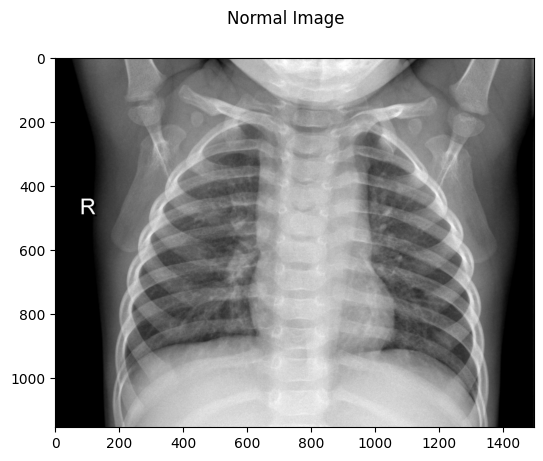

In [ ]:
normal_images=[]
for img_path in glob.glob(data+'/train/NORMAL/*'):
  normal_images.append(mpimg.imread(img_path))
fig=plt.figure()
fig.suptitle('Normal Image')
plt.imshow(normal_images[0],cmap='gray')

In [ ]:
Image_Width=150
Image_Height=150
Channels=3
INPUT_SHAPE=(Image_Width,Image_Height,Channels)
NB_CLASSES=2
EPOCHS=30
BATCH_SIZE=6

In [ ]:
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE,
                 kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# Optional: model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# Optional: model.add(Dropout(0.25))

model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu',
                kernel_regularizer=regularizers.l2(0.001))) # Added L2 regularization
model.add(Dropout(0.7))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,377 (18.42 MB)

 Trainable params: 4,828,929 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

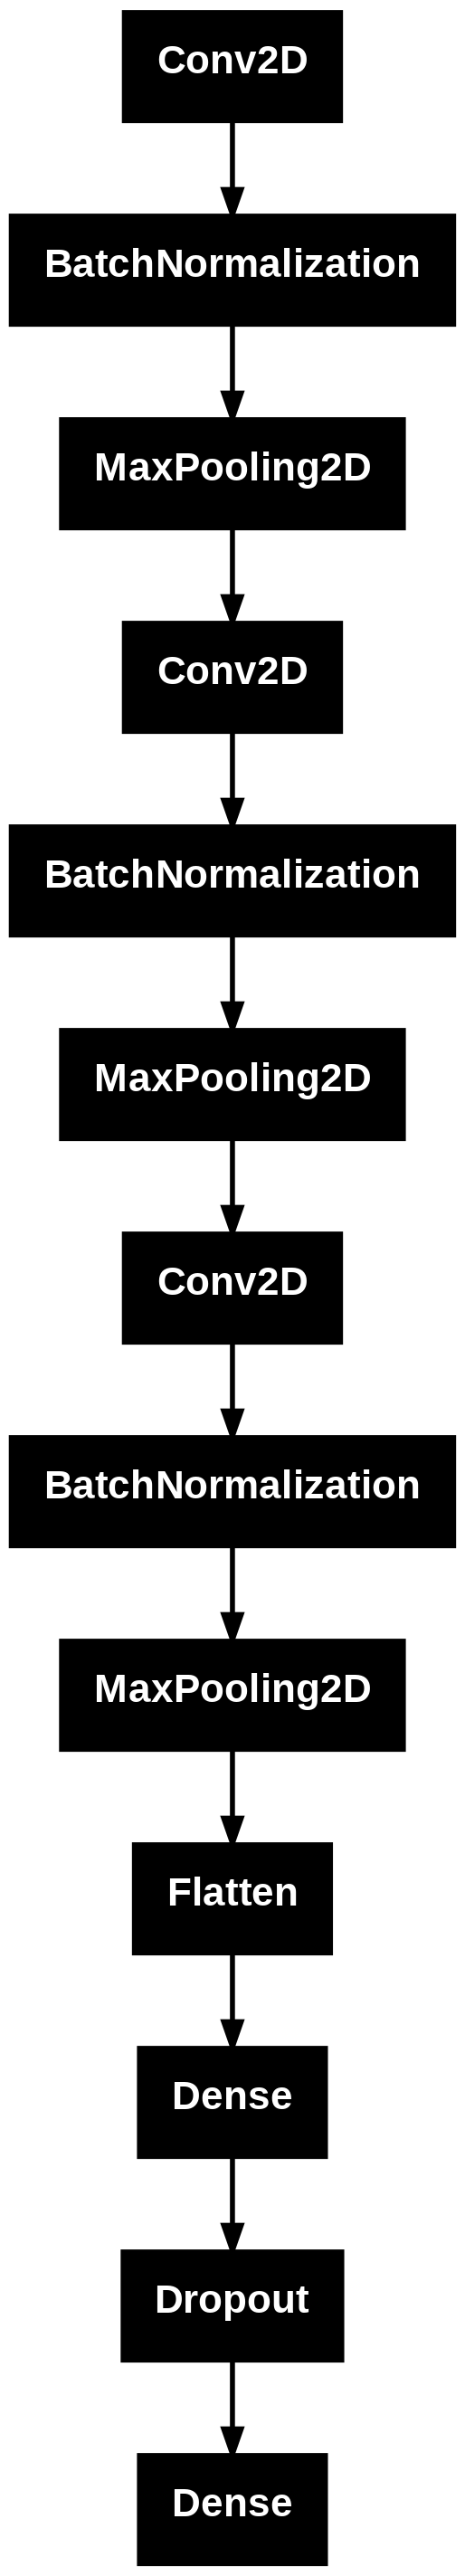

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png')

In [ ]:
train_dir = "/content/chest_xray_data/chest_xray/train"
val_dir = "/content/chest_xray_data/chest_xray/val"
test_dir = "/content/chest_xray_data/chest_xray/test"

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=16,
    label_mode='binary'  # use 'categorical' only if you want one-hot vectors
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(150, 150),
    batch_size=16,
    label_mode='binary'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size=16,
    label_mode='binary'
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
train_image_count = 5216
val_image_count = 16

steps_per_epoch = train_image_count // BATCH_SIZE
validation_steps = val_image_count//BATCH_SIZE

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_dataset,
    validation_steps=validation_steps

)

Epoch 1/30
326/869 ━━━━━━━━━━━━━━━━━━━━ 49s 91ms/step - accuracy: 0.8576 - loss: 2.0211

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.



869/869 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.8742 - loss: 1.5162 - val_accuracy: 0.5625 - val_loss: 5.7763
Epoch 2/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.8870 - loss: 0.7226 - val_accuracy: 1.0000 - val_loss: 0.5602
Epoch 3/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.9132 - loss: 0.6421 - val_accuracy: 0.7500 - val_loss: 3.0452
Epoch 4/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9274 - loss: 0.6006 - val_accuracy: 0.6875 - val_loss: 4.8376
Epoch 5/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9288 - loss: 0.5192 - val_accuracy: 0.8125 - val_loss: 0.7160
Epoch 6/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9349 - loss: 0.5543 - val_accuracy: 1.0000 - val_loss: 0.5042
Epoch 7/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.9307 - loss: 0.6638 - val_accuracy: 0.8125 - val_loss: 1.6320
Epoch 8/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9462 - loss: 0.6185 - val_accurac

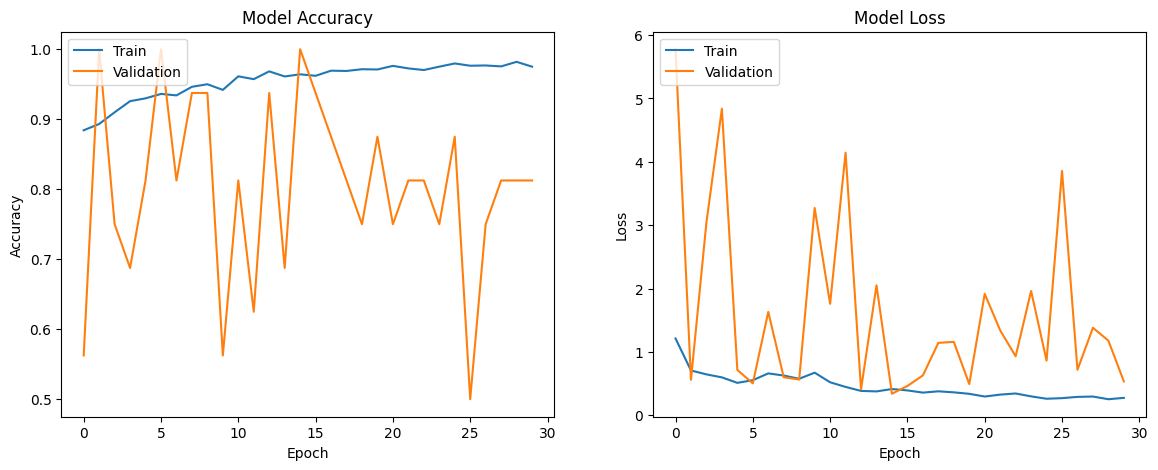

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train','Validation'],loc='upper left')
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
print("training accuracy",history.history['accuracy'][-1])
print("training accuracy",history.history['val_accuracy'][-1])

training accuracy 0.9750766754150391
training accuracy 0.8125


In [ ]:
class_names = val_dataset.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


In [ ]:
true_labels=[]
for images,labels in val_dataset:
  true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)

In [ ]:
predictions = model.predict(val_dataset)
predicted_classes=(predictions>0.5).astype("int32").flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


In [ ]:
predicted_labels = [class_names[i] for i in predicted_classes]
true_labels_names = [class_names[int(i)] for i in true_labels]

/tmp/ipython-input-2733933294.py:2: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [ ]:
print(predicted_labels[:10])
print(true_labels_names[:10])

['PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA']
['PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA']


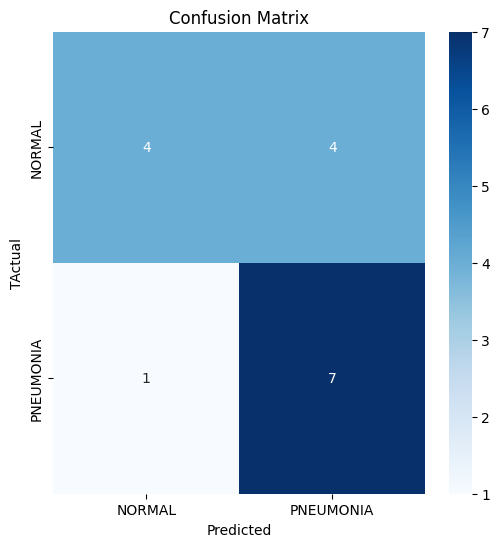

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,6))
cf=confusion_matrix(true_labels_names,predicted_labels)
sns.heatmap(cf,
            cmap='Blues',
            annot=True,
            fmt='',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("TActual")
plt.show()

In [ ]:
predicted_classes=np.array(predicted_classes)


In [ ]:
label_map={'NORMAL':0, 'PNEUMONIA':1}

pred_class=np.array([label_map[label] for label in predicted_labels])
true_class=np.array([int(label) for label in true_labels]) # Iterate through flattened array

/tmp/ipython-input-4284918020.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [ ]:
correct=np.nonzero(pred_class==true_class)[0]
correct=np.nonzero(pred_class==true_class)[0]
accuracy=len(correct)/len(true_class)
print(f"accuracy:{accuracy:.4f}")

accuracy:0.6875


In [ ]:
val_images = []
val_labels = []

for img, labels in val_dataset.unbatch().take(100):
  val_images.append(img.numpy())
  val_labels.append(labels.numpy())

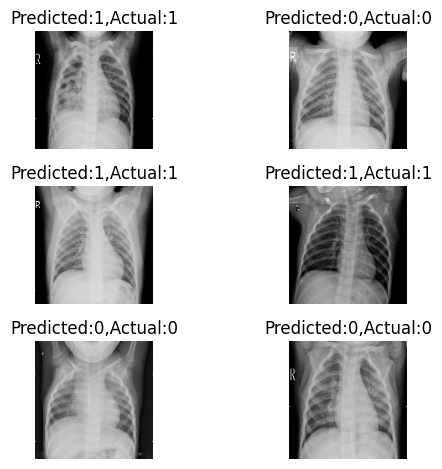

In [ ]:
i=0
for c in correct[:6]:
  plt.subplot(3,2,i+1)
  plt.imshow(val_images[c].astype("uint8")) # Corrected variable name
  plt.title("Predicted:{},Actual:{}".format(pred_class[c],true_class[c]))
  plt.axis('off')
  i += 1 # Increment i

plt.tight_layout()
plt.show()

In [ ]:
model.save('training.h5')